# Analysis of outside temperature profile 

Comparison between the true meteo distribution (all data sampled from the databse meteostat) and the artificial distribution created interpolating the values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_loader import load_data

In [2]:
temperature_data = pd.read_csv('simulation_results/clean_data/all_temperatures.csv')
# Load a random scenario (all external factors are the same across scenarios)
simulations = pd.read_csv('simulation_results/clean_data/results_pid_with_disturbances.csv') 

simulation_temperatures = simulations['outsideTemp']

count_above_20 = (temperature_data['temp'] > 20.0).sum()
count_above_10 = (temperature_data['temp'] > 10.0).sum()

print(f"Number of temperatures above 10.0°C: {count_above_10}")

print(f"Number of temperatures above 20.0°C: {count_above_20}")

Number of temperatures above 10.0°C: 639
Number of temperatures above 20.0°C: 0


In [1]:
def qq_plot_two_samples(data1, data2, n=100):
    # Generate n evenly spaced quantiles between 0 and 1
    quantiles = np.linspace(0, 1, n)

    # Calculate quantiles for each dataset
    q1 = np.quantile(data1, quantiles)
    q2 = np.quantile(data2, quantiles)
 
    #print(f"Quantiles of Dataset 1: {q1}")
    #print(f"Quantiles of Dataset 2: {q2}")
    # Create a DataFrame for plotting
    df = pd.DataFrame({
        'Dataset 1': q1,
        'Dataset 2': q2
    })

    # Plot scatter plot of quantiles
    sns.scatterplot(x='Dataset 1', y='Dataset 2', data=df,size=100, alpha=0.9)
    
    # Plot 45-degree reference line
    min_val = min(df.min())
    max_val = max(df.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    
    plt.title('Q-Q Plot: Outside Temperature')
    plt.xlabel('Quantiles of True Data')
    plt.ylabel('Quantiles of Empirical Data')
    plt.savefig('plots/output_distributions/qq_plot_outside_temperature.png')
    plt.show()

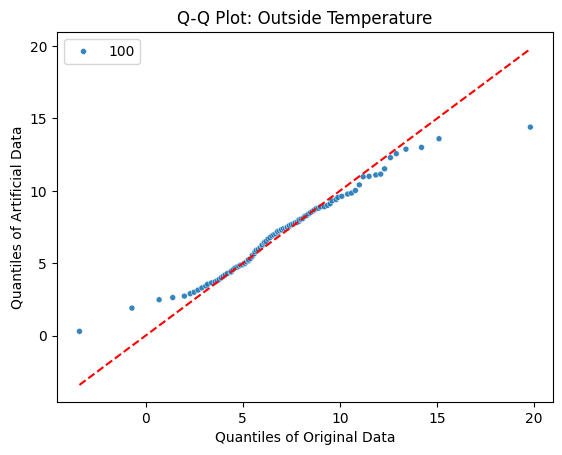

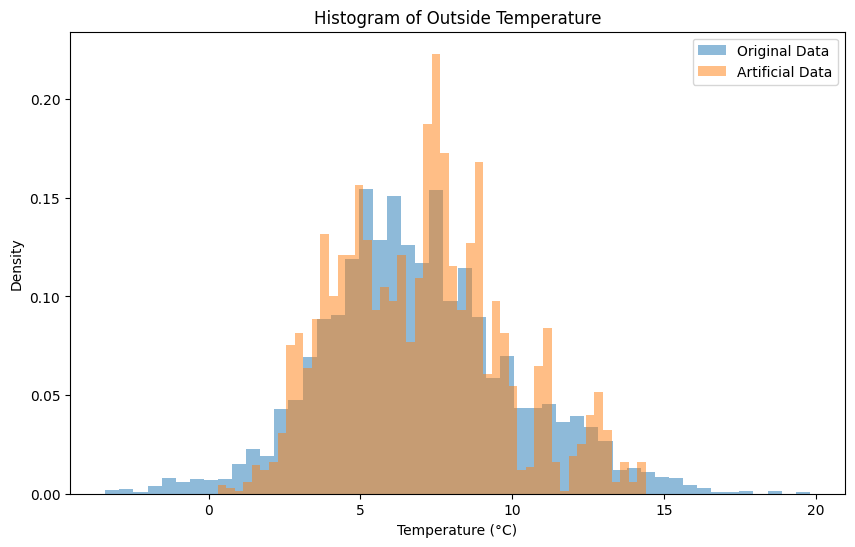

In [8]:
qq_plot_two_samples(temperature_data['temp'], simulation_temperatures)

plt.figure(figsize=(10, 6))
plt.hist(temperature_data['temp'], bins=50, alpha=0.5, label='Original Data', density=True)
plt.hist(simulation_temperatures, bins=50, alpha=0.5, label='Artificial Data', density=True)
plt.title('Histogram of Outside Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.legend()
plt.savefig('plots/output_distributions/outside_temperature_distribution.png')

In [5]:
window_states = simulations[['windowState', 'time', 'simulation_run']]

